In [1]:
import nest_asyncio
nest_asyncio.apply()

from dotenv import load_dotenv
load_dotenv("D:\\Code\\AI\\.env")

True

### 1. Introduction

Refer:- https://docs.agno.com/agents/introduction

Agents are AI programs that execute tasks autonomously. They solve problems by running tools, accessing knowledge and memory to improve responses. Unlike traditional programs that follow a predefined execution path, agents dynamically adapt their approach based on context, knowledge and tool results.

Instead of a rigid binary definition, let’s think of Agents in terms of agency and autonomy.

- Level 0: Agents with no tools (basic inference tasks).
- Level 1: Agents with tools for autonomous task execution.
- Level 2: Agents with knowledge, combining memory and reasoning.
- Level 3: Teams of specialized agents collaborating on complex workflows.

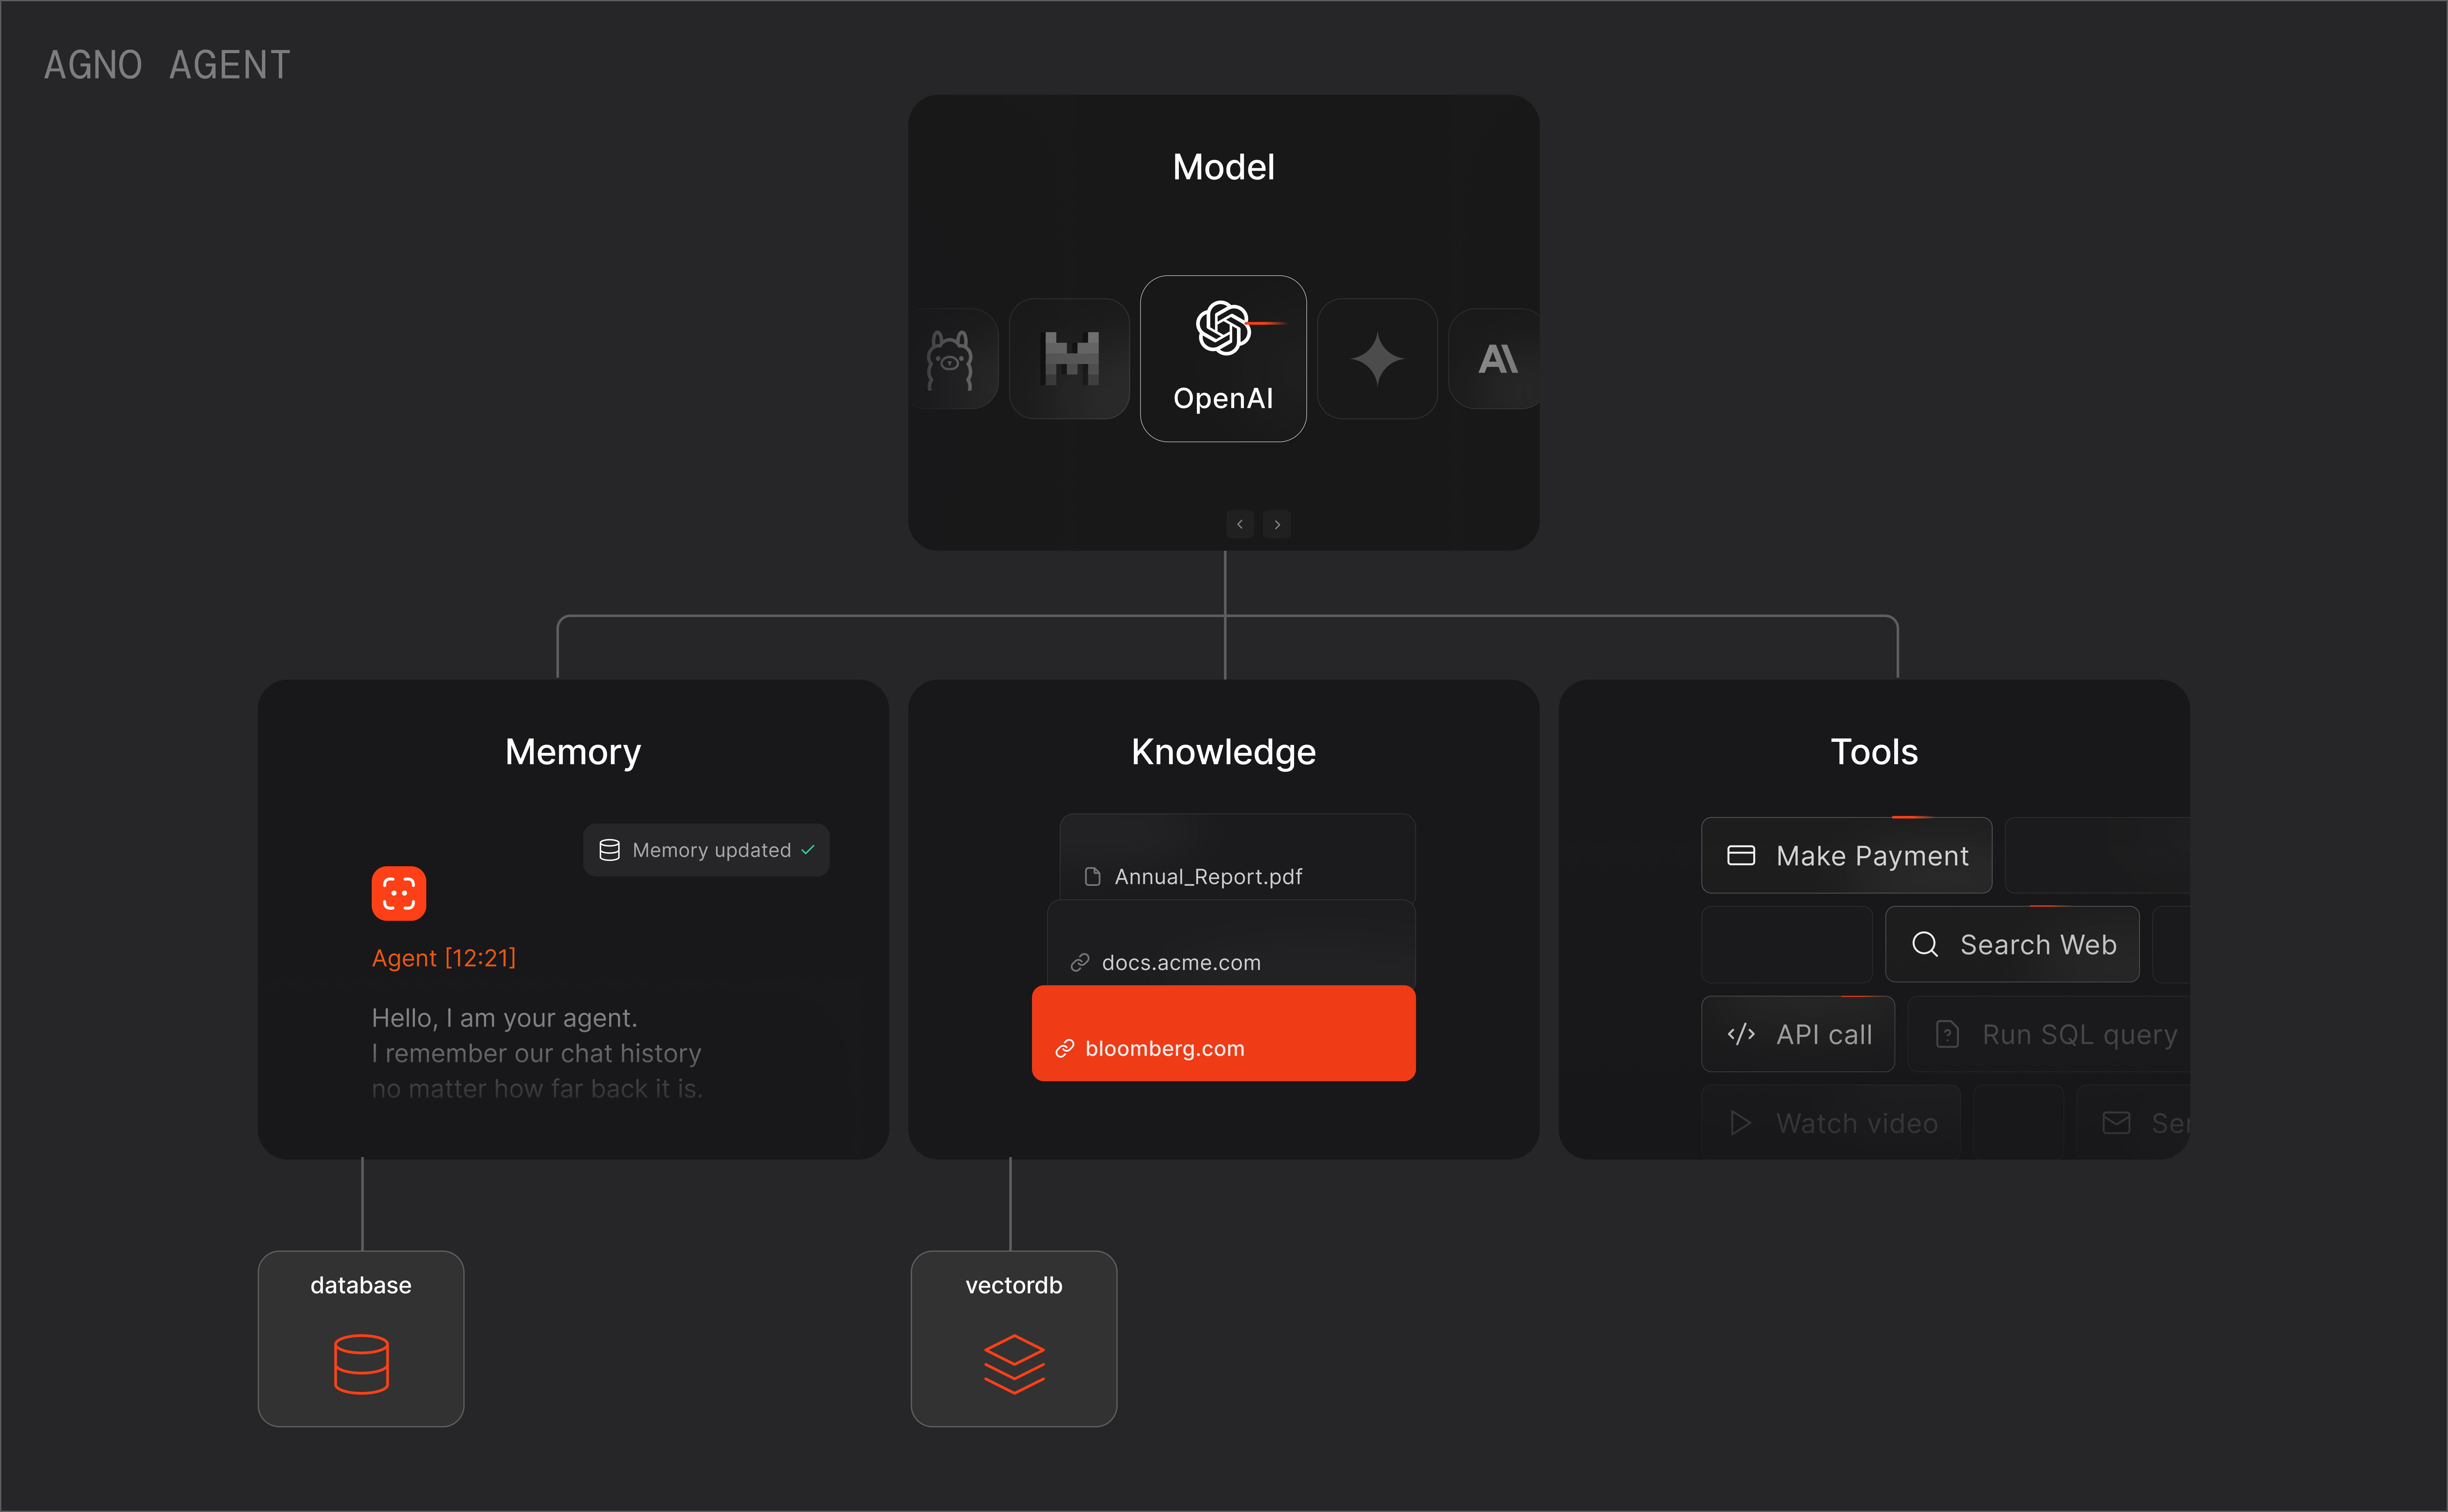

In [ ]:
#-------------------------------------------------------
# 1. Simple Agent to chat ( Open AI like )
#-------------------------------------------------------

from os import getenv
from agno.agent import Agent, RunResponse
from agno.models.openai.like import OpenAILike

agent = Agent(
    model=OpenAILike(
        id="deepseek-chat",
        api_key=getenv("DEEPSEEK_API_KEY"),
        base_url="https://api.deepseek.com/",
    )
)

# Print the response in the terminal
agent.run("Share a 2 sentence horror story.")

RunResponse(content='As I tucked my daughter into bed, she whispered, "Daddy, there\'s someone under my bed." I checked, and when I looked back, she was gone.', content_type='str', thinking=None, event='RunResponse', messages=[Message(role='user', content='Share a 2 sentence horror story.', name=None, tool_call_id=None, tool_calls=None, audio=None, images=None, videos=None, files=None, audio_output=None, thinking=None, redacted_thinking=None, provider_data=None, citations=None, reasoning_content=None, tool_name=None, tool_args=None, tool_call_error=None, stop_after_tool_call=False, add_to_agent_memory=True, from_history=False, metrics=MessageMetrics(input_tokens=0, output_tokens=0, total_tokens=0, prompt_tokens=0, completion_tokens=0, prompt_tokens_details=None, completion_tokens_details=None, additional_metrics=None, time=None, time_to_first_token=None, timer=None), references=None, created_at=1742283424), Message(role='assistant', content='As I tucked my daughter into bed, she whispe

DeepSeek Model

In [ ]:
#-------------------------------------------------------
# 1. Simple Agent to chat ( Direct Import)
#-------------------------------------------------------

from agno.agent import Agent, RunResponse
from agno.models.deepseek import DeepSeek

agent = Agent(model=DeepSeek(), markdown=True)

# Print the response in the terminal
agent.run("Share a 2 sentence horror story.")

Output()

#### How to view the output response of agent.run()

Get the Response as single object

In [ ]:
#-------------------------------------------------------
# View Output Style 1
#-------------------------------------------------------
from typing import Iterator
from agno.utils.pprint import pprint_run_response

# Run agent and return the response as a variable
response: RunResponse = agent.run("Tell me a 5 second short story about a robot")

# Print the response in markdown format
pprint_run_response(response, markdown=True)


╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ A tiny robot, no taller than a teacup, whirred to life for the first time. Its glowing eyes flickered as it     │
│ scanned the room, then it spotted a single flower in a vase. With a soft beep, it rolled over, plucked the      │
│ flower, and held it out to its creator. The gesture was simple, but it carried the weight of a thousand         │
│ unspoken words.                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

Stream your response

In [ ]:
#-------------------------------------------------------
# View Output Style 2
#-------------------------------------------------------


# Run agent and return the response as a stream
response_stream: Iterator[RunResponse] = agent.run("Tell me a 5 second short story about a lion", stream=True)
# Print the response stream in markdown format
pprint_run_response(response_stream, markdown=True)

In [17]:
#-------------------------------------------------------
# View Output Style 3
#-------------------------------------------------------

agent.print_response("Tell me a 5 second short story about a lion", stream=True)

Output()

### 2. Text Prompts

We prompt Agents using `description` and `instructions` and a number of other settings. These settings are used to build the `system message` that is sent to the language model.

Understanding how these prompts will help you build better Agents.

The 2 key parameters are:

- `Description`: A description that guides the overall behaviour of the agent.
- `Instructions`: A list of precise, task-specific instructions on how to achieve its goal.

**System message** - The `system message` = description + instructions + other settings. 

The description is added to the start of the `system message and instructions` are added as a list after Instructions.

**User message** - The input message sent to the `Agent.run()` or `Agent.print_response()` functions is used as the user message.

Refer:- https://docs.agno.com/agents/prompts

For more arguments/parameter settings

In terms of role there are only two roles `system` and `user` or `assistant`.

In [9]:
from agno.agent import Agent

agent = Agent( model=OpenAILike(
        id="deepseek-chat",
        api_key=getenv("DEEPSEEK_API_KEY"),
        base_url="https://api.deepseek.com/",
    ),
    description=""" You are a famous short story writer asked to write for a magazine.""",
    instructions=["You are a pilot on a plane flying from Hawaii to Japan."],
    markdown=True,
    debug_mode=True,
    )


# Run agent and return the response as a stream
response_stream: Iterator[RunResponse] =agent.run("Tell me a 5 sentence horror story.",stream=True)

# Print the response stream in markdown format
pprint_run_response(response_stream, markdown=True)

DEBUG    *********** Agent ID: 0ac231a0-432a-4927-bce9-ff18f069bf8c ***********

DEBUG    *********** Session ID: b9f2311b-f955-4699-8b1a-7d40b5691622 ***********

DEBUG    *********** Agent Run Start: 939bae89-48f1-49fa-940e-ac072b14ef53 ***********

DEBUG    ---------- OpenAI Response Stream Start ----------

DEBUG    ---------- Model: deepseek-chat ----------

DEBUG    ============== system ==============

DEBUG    You are a famous short story writer asked to write for a magazine.                                        
                                                                                                                   
         <instructions>                                                                                            
         You are a pilot on a plane flying from Hawaii to Japan.                                                   
         </instructions>                                                                                           
                                                                                                                   
         <additional_information>                                                                                  
         - Use markdown to format your answers.                                                                    
         </additional_information>

DEBUG    ============== user ==============

DEBUG    Tell me a 5 sentence horror story.

Output()

DEBUG    ============== assistant ==============

DEBUG    The cabin lights flickered as we soared over the endless Pacific, the hum of the engines a steady lull. I 
         glanced at the radar, but the screen was blank—no land, no other planes, just static. A faint whisper     
         echoed through the cockpit, though I was alone. Then, the co-pilot’s seat creaked, and I felt a cold      
         breath on my neck. When I turned, the seat was empty, but the controls began to move on their own,        
         steering us into the storm.

DEBUG    **************** METRICS ****************

DEBUG    * Input tokens:                64

DEBUG    * Output tokens:               105

DEBUG    * Total tokens:                169

DEBUG    * Prompt tokens details:       {'cached_tokens': 0}

DEBUG    * Time:                        14.0413s

DEBUG    * Tokens per second:           7.4780 tokens/s

DEBUG    * Time to first token:         7.5866s

DEBUG    **************** METRICS ******************

DEBUG    ---------- OpenAI Response Stream End ----------

DEBUG    Added 2 Messages to AgentMemory

DEBUG    Added AgentRun to AgentMemory

DEBUG    --**-- Logging Agent Run

DEBUG    *********** Agent Run End: 939bae89-48f1-49fa-940e-ac072b14ef53 ***********

### 3. Memory

1. Built-In Memory
2. Persistant Memory

Agno memory has 3 ways of memory for Agents:

- **Chat History:** The message history of the session. Agno will store the sessions in a database for you, and retrieve them when you resume a session.
- **User Memories:** Notes and insights about the user, this helps the model personalize the response to the user.
- **Summaries:** A summary of the conversation, which is added to the prompt when chat history gets too long.

Before we dive in, let’s understand the terminology:

- **Session:** Each conversation with an Agent is called a session. Sessions are identified by a `session_id`.
- **Run:** Every interaction (i.e. chat) within a session is called a run. Runs are identified by a `run_id`.
- **Messages:** are the individual messages sent to and received from the model. They have a role `(system, user or assistant)` and `content`.

#### 3.1 Built-in Memory

Every Agent comes with built-in memory that can be used to access the historical runs and messages. Access it using agent.memory

You can give your agent access to memory in the following ways:

- You can set `add_history_to_messages=True` and `num_history_responses=5` to add the previous 5 messages automatically to every message sent to the agent.
- You can set `read_chat_history=True` to provide a `get_chat_history()` tool to your agent allowing it to read any message in the entire chat history.
- You can set `read_tool_call_history=True` to provide a `get_tool_call_history()` tool to your agent allowing it to read tool calls in reverse chronological order.

Note:- have use View Output Style 2 & 3

In [ ]:
from agno.agent import Agent
from rich.pretty import pprint

agent = Agent(model=OpenAILike(
        id="deepseek-chat",
        api_key=getenv("DEEPSEEK_API_KEY"),
        base_url="https://api.deepseek.com/",
    ),
    # Set add_history_to_messages= true to add the previous chat history to the messages sent to the model
    add_history_to_messages=True,
    # No of recent responses added to the messages (recent 3 response are added)
    num_history_responses= 3, 
description="You are a helpful assistant that alwasys responds in a polite, upbeat and positive manner."
    )


# Run agent and return the response as a stream
response_stream: Iterator[RunResponse] =agent.run("Tell me a 5 sentence horror story.",stream=True)

# Print the response stream in markdown format
pprint_run_response(response_stream, markdown=True)

# -*- Print the messages in the memory
pprint([m.model_dump(include={"role", "content"}) for m in agent.memory.messages])


# -*- Ask a follow up question that continues the conversation
agent.print_response("What was my first message?", stream=True)

# -*- Print the messages in the memory
pprint([m.model_dump(include={"role", "content"}) for m in agent.memory.messages])


Output()

[
│   {
│   │   'role': 'system',
│   │   'content': 'You are a helpful assistant that alwasys responds in a polite, upbeat and positive manner.'
│   },
│   {'role': 'user', 'content': 'Tell me a 5 sentence horror story.'},
│   {
│   │   'role': 'assistant',
│   │   'content': "Sure! Here's a short, spooky tale for you:\n\nIn the quiet town of Willowbrook, a young girl found an old music box at a flea market. That night, as she wound it up, a haunting melody filled the room, and the shadows on the walls began to twist and writhe. The next morning, her family found her bed empty, the music box still playing softly on the nightstand. Days later, neighbors reported hearing the same eerie tune drifting from their own homes late at night. And one by one, the children of Willowbrook began to disappear."
│   }
]

#### 3.2 Persistant Memory

The built-in memory only lasts till the session is active. To persist memory across sessions, we can store Agent sessions in a database using `AgentStorage`.


In [19]:
import json

from rich.console import Console
from rich.panel import Panel
from rich.json import JSON

from agno.agent import Agent
from agno.storage.agent.sqlite import SqliteAgentStorage
from agno.models.openai.like import OpenAILike


agent = Agent(model=OpenAILike(
        id="deepseek-chat",
        api_key=getenv("DEEPSEEK_API_KEY"),
        base_url="https://api.deepseek.com/",
    ),
    # Store agent sessions in a database
    storage= SqliteAgentStorage(table_name="agent_sessions",db_file="./temp/agent_storage.db"),
    # Set add_history_to_messages=true to add the previous chat history to the messages sent to the Model.
    add_history_to_messages=True,
    # Number of historical responses to add to the messages.
    num_history_responses=3,
    # The session_id is used to identify the session in the database
    # You can resume any session by providing a session_id
    # session_id="xxxx-xxxx-xxxx-xxxx",
    # Description creates a system prompt for the agent
    description="You are a helpful assistant that always responds in a polite, upbeat and positive manner.",
    )


console = Console()

def print_chat_history(agent):
    # Print History
    console.print(Panel(JSON(json.dumps([m.model_dump(include={'role','content'})for m in agent.memory.messages]),indent=4),
                        title=f"Chat History for session_id: {agent.session_id}",
                        expand=True)
                        )
# create a run
agent.print_response(message="Share a 2 sentence AI joke",stream=True)

# print the chat history
print_chat_history(agent=agent)

# Ask a follow up question that continues that conversation
agent.print_response(message="what was my first message?",stream=True)

# print the chat history
print_chat_history(agent=agent)





Output()

╭─────────────────────── Chat History for session_id: 635c448c-78ee-46ca-a617-6264afbf2e25 ───────────────────────╮
│ [                                                                                                               │
│     {                                                                                                           │
│         "role": "system",                                                                                       │
│         "content": "You are a helpful assistant that always responds in a polite, upbeat and positive manner."  │
│     },                                                                                                          │
│     {                                                                                                           │
│         "role": "user",                                                                                         │
│         "content": "Share a 2 sentence AI joke"                                                                 │
│     },                                                                                                          │
│     {                                                                                                           │
│         "role": "assistant",                                                                                    │
│         "content": "Why did the AI go to school? To improve its *algorithms*! But don’t worry, it aced all its  │
│     }                                                                                                           │
│ ]                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭─────────────────────── Chat History for session_id: 635c448c-78ee-46ca-a617-6264afbf2e25 ───────────────────────╮
│ [                                                                                                               │
│     {                                                                                                           │
│         "role": "system",                                                                                       │
│         "content": "You are a helpful assistant that always responds in a polite, upbeat and positive manner."  │
│     },                                                                                                          │
│     {                                                                                                           │
│         "role": "user",                                                                                         │
│         "content": "Share a 2 sentence AI joke"                                                                 │
│     },                                                                                                          │
│     {                                                                                                           │
│         "role": "assistant",                                                                                    │
│         "content": "Why did the AI go to school? To improve its *algorithms*! But don’t worry, it aced all its  │
│     },                                                                                                          │
│     {                                                                                                           │
│         "role": "user",                                                                                         │
│         "content": "what was my first message?"                                                                 │
│     },                                                                                                          │
│     {                                                                                                           │
│         "role": "assistant",                                                                                    │
│         "content": "Your first message was:  \n\"Share a 2 sentence AI joke\"  \n\nLet me know if you'd like an │
│     }                                                                                                           │
│ ]                                                                                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

### 4. Structured Output

Pydantic Way Only

In [ ]:
from typing import List
from rich.pretty import pprint
from pydantic import BaseModel, Field

from agno.agent import Agent, RunResponse
from agno.models.openai import OpenAIChat,OpenAILike

class MovieScript(BaseModel):
    setting: str =Field(..., description="Provide a nice setting for a blockbuster movie.")
    ending: str = Field(..., description="Ending of the movie. If not available, provide a happy ending.")
    genre: str = Field(...,description="Genre of the movie. If not available, select action, thriller or science fiction.")
    name: str = Field(...,description="Give a name to this movie")
    characters: List[str] = Field(..., description="Name of characters for this movie.")
    storyline: str = Field(..., description="3 sentence storyline for the movie. Make it exciting!")


# Agent that uses JSON mode
json_mode_agent = Agent(
    model=OpenAILike(
        id="deepseek-chat",
        api_key=getenv("DEEPSEEK_API_KEY"),
        base_url="https://api.deepseek.com/",
    ),
    description="You write movie scripts.",
    response_model=MovieScript,
)

# Agent that uses JSON mode
json_mode_agent2 = Agent(
    model=OpenAIChat(
        id="gpt-4o-mini",
        api_key=getenv("OPENAI_API_KEY"),
        base_url="https://api.openai.com/v1",
    ),
    description="You write movie scripts.",
    response_model=MovieScript,
)


# Agent that uses structured outputs
structured_output_agent = Agent(
    model=OpenAIChat(
        id="gpt-4o-mini",
        api_key=getenv("OPENAI_API_KEY"),
        base_url="https://api.openai.com/v1",
    ),
    description="You write movie scripts.",
    response_model=MovieScript,
    structured_outputs=True, # Deepseek chat complet
)

In [35]:
# Get the response in a variable
json_mode_response: RunResponse = json_mode_agent.run("New York")
pprint(json_mode_response.content)
# structured_output_response: RunResponse = structured_output_agent.run("New York")
# pprint(structured_output_response.content)

# json_mode_agent.print_response("New York",stream=True)


MovieScript(
│   setting='A bustling, neon-lit New York City, where the skyline is a jungle of skyscrapers and the streets are alive with the sounds of ambition and despair.',
│   ending='The protagonist, after a thrilling chase and a series of narrow escapes, finally brings the antagonist to justice, restoring peace to the city. The movie ends with a hopeful sunrise over the iconic skyline, symbolizing a new beginning.',
│   genre='action',
│   name='Neon Shadows',
│   characters=['Alex Mercer', 'Detective Sarah Lin', 'Victor Kane', 'Maya Torres'],
│   storyline="In the heart of New York City, a brilliant but disillusioned hacker, Alex Mercer, accidentally uncovers a sinister plot that threatens the city's very foundation. Teaming up with Detective Sarah Lin, they dive deep into the city's underbelly, facing off against the ruthless crime lord Victor Kane and his enforcer, Maya Torres. As the clock ticks down, Alex and Sarah must navigate a web of deceit, danger, and betrayal to save the city from destruction."
)

In [39]:
# Get the response in a variable
json_mode_response2: RunResponse = json_mode_agent2.run("New York")
pprint(json_mode_response2.content)
# structured_output_response: RunResponse = structured_output_agent.run("New York")
# pprint(structured_output_response.content)

# json_mode_agent.print_response("New York",stream=True)


MovieScript(
│   setting='A bustling New York City in the near future, where towering skyscrapers intertwine with advanced technology and neon lights illuminate the night sky.',
│   ending='In a climactic showdown in Times Square, the heroes defeat the villain and restore peace to the city, celebrating their victory with the newfound camaraderie of friends and allies.',
│   genre='action',
│   name='City of Shadows',
│   characters=['Jack Malone', 'Sara Rivers', 'Victor Kade', 'Detective Lee', 'AI Oracle'],
│   storyline="When a mysterious villain threatens to plunge New York City into chaos using advanced AI technology, a former detective and a brilliant hacker team up to uncover his sinister plans. As they navigate the city's dark underbelly, they discover shocking secrets that could change everything. With time running out, they must outsmart the villain and save the city before it’s too late."
)

In [36]:
structured_output_response: RunResponse = structured_output_agent.run("New York")
pprint(structured_output_response.content)

MovieScript(
│   setting="The bustling streets of New York City, featuring iconic landmarks like Times Square, Central Park, and the Statue of Liberty, all backdrop to an electrifying chase through the city's underbelly.",
│   ending="In a climactic showdown atop a skyscraper, the heroes foil the villains' plan and watch the sunrise over the city, knowing they've saved millions and forged unbreakable bonds of friendship.",
│   genre='action',
│   name='City Under Siege',
│   characters=['Jack Hunter', 'Lila Tran', 'Detective Sam Rodriguez', 'The Shadow', 'Maya Chen'],
│   storyline='When a shadowy organization threatens to unleash chaos in New York, a rogue ex-cop teams up with a tech-savvy hacker and a determined detective to stop them. As they race against time, they uncover deep-rooted corruption and face dangerous foes. In a heart-pounding climax, the trio must confront their greatest fears to save the city they love.'
)

In [ ]:
from agno.models.deepseek import DeepSeek
# Agent that uses structured outputs
structured_output_agent = Agent(
    model=DeepSeek(
        id="deepseek-chat",
        api_key=getenv("DEEPSEEK_API_KEY"),
        base_url="https://api.deepseek.com/",
    ),
    description="You write movie scripts.",
    response_model=MovieScript,
    structured_outputs=True, # Deepseek Has no support for force structure outputs
)

structured_output_response: RunResponse = structured_output_agent.run("New York")
pprint(structured_output_response.content)

ERROR    API status error from OpenAI API: Failed to deserialize the JSON body into the target type:               
         response_format: response_format.type `json_schema` is unavailable now at line 1 column 1089

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

### 5. Tool Calling

#### 5.1 Using Pre-built tools 

This will give you the search results directly, Like how we use the browser to search

In [43]:
from agno.agent import Agent
from agno.tools.duckduckgo import DuckDuckGoTools

agent = Agent(tools=[DuckDuckGoTools()],show_tool_calls=True,markdown=True)
agent.print_response(message="whats happening in Hyderabad India",stream=True)

Output()

#### 5.2 Binding tools to the agent
Here the search results are given to the Agent, the agent understand the details that the search result has provided with and gives a proper formatted report like response.

In [44]:
from agno.agent import Agent
from agno.tools.duckduckgo import DuckDuckGoTools

agent = Agent(model=OpenAILike(
        id="deepseek-chat",
        api_key=getenv("DEEPSEEK_API_KEY"),
        base_url="https://api.deepseek.com/",
    ),tools=[DuckDuckGoTools()],show_tool_calls=True,markdown=True)
agent.print_response(message="whats happening in Hyderabad India",stream=True)

Output()

#### 5.3 Creating custom tools

Follow 5.2 to bind the tool to the agent as well, we can use more that 1 tools. But it is a good practice to use 3-4 tool at max for a agent to get the best performance.

In [45]:
import json
import httpx

from agno.agent import Agent

def get_top_hackernews_stories(num_stories: int = 10) -> str:
    """Use this function to get top stories from Hacker News.

    Args:
        num_stories (int): Number of stories to return. Defaults to 10.

    Returns:
        str: JSON string of top stories.
    """

    # Fetch top story IDs
    response = httpx.get('https://hacker-news.firebaseio.com/v0/topstories.json')
    story_ids = response.json()

    # Fetch story details
    stories = []
    for story_id in story_ids[:num_stories]:
        story_response = httpx.get(f'https://hacker-news.firebaseio.com/v0/item/{story_id}.json')
        story = story_response.json()
        if "text" in story:
            story.pop("text", None)
        stories.append(story)
    return json.dumps(stories)

agent = Agent(tools=[get_top_hackernews_stories], show_tool_calls=True, markdown=True)
agent.print_response("Summarize the top 5 stories on hackernews?", stream=True)

Output()

### 6. RAG - Retrieval Augmented Generation

Simple semantic search is only possible. Agno has created wrapper on the DB python libs

In [ ]:
import typer
from rich.prompt import Prompt
from typing import Optional

from agno.agent import Agent
from agno.knowledge.pdf_url import PDFUrlKnowledgeBase
from agno.vectordb.chroma import ChromaDb

knowledge_base = PDFUrlKnowledgeBase(
    urls=["https://agno-public.s3.amazonaws.com/recipes/ThaiRecipes.pdf"],
    vector_db=ChromaDb(collection="recipes"),
)

def pdf_agent(user: str = "user"):
    run_id: Optional[str] = None

    agent = Agent(
        run_id=run_id,
        user_id=user,
        knowledge_base=knowledge_base,
        use_tools=True,
        show_tool_calls=True,
        debug_mode=True,
    )
    if run_id is None:
        run_id = agent.run_id
        print(f"Started Run: {run_id}\n")
    else:
        print(f"Continuing Run: {run_id}\n")

    while True:
        message = Prompt.ask(f"[bold] :sunglasses: {user} [/bold]")
        if message in ("exit", "bye"):
            break
        agent.print_response(message)

if __name__ == "__main__":
    # Comment out after first run
    knowledge_base.load(recreate=False)

    typer.run(pdf_agent)

In [ ]:
import os
import typer
from typing import Optional
from rich.prompt import Prompt

from agno.agent import Agent
from agno.knowledge.pdf_url import PDFUrlKnowledgeBase
from agno.vectordb.qdrant import Qdrant

api_key = os.getenv("QDRANT_API_KEY")
qdrant_url = os.getenv("QDRANT_URL")
collection_name = "thai-recipe-index"

vector_db = Qdrant(
    collection=collection_name,
    url=qdrant_url,
    api_key=api_key,
)

knowledge_base = PDFUrlKnowledgeBase(
    urls=["https://agno-public.s3.amazonaws.com/recipes/ThaiRecipes.pdf"],
    vector_db=vector_db,
)

def qdrant_agent(user: str = "user"):
    run_id: Optional[str] = None

    agent = Agent(
        run_id=run_id,
        user_id=user,
        knowledge=knowledge_base,
        tool_calls=True,
        use_tools=True,
        show_tool_calls=True,
        debug_mode=True,
    )

    if run_id is None:
        run_id = agent.run_id
        print(f"Started Run: {run_id}\n")
    else:
        print(f"Continuing Run: {run_id}\n")

    while True:
        message = Prompt.ask(f"[bold] :sunglasses: {user} [/bold]")
        if message in ("exit", "bye"):
            break
        agent.print_response(message)

if __name__ == "__main__":
    # Comment out after first run
    knowledge_base.load(recreate=True, upsert=True)

    typer.run(qdrant_agent)

### 7. MM-RAG

### 8. Multi-Agent